In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

from plots import *
from hsic import *

labels = [r"X_1", r"X_2", r"X_3", r"X_4", r"X_5"]
colors = ["darkcyan", "darkorange", "grey", "blue", "purple"]

np.random.seed(1994)

# 1. Normalization of hyperparameters space


Let $f: [0,2]^2 \rightarrow \{0,1\}$ such that 
$$
       f(X_1, X_2) = 
   \bigg\{\begin{array}{ll}
    1 & \text{if  } X_1 \in [0,1], X_2 \in [0,1],\\
    0 & \text{otherwise.  } 
    \end{array}
$$

In [2]:
def h(X1, X2):
    if (X1 > 1) & (X2 > 1):
        return 1
    else:
        return 0
vH = np.vectorize(h)


In [3]:
N = 10000
# The actual best quantile has probabilty 0.25,
# we set it to 0.24 to avoid estimation error 
# and ensure the quantile value is 0
q = 0.24

X1 = np.random.random_sample(N)*2
X1_ = []
while len(X1_) < N:
    sample = np.random.normal(1, 0.3)
    if (sample <= 2) & (sample >= 0):
        X1_.append(sample)
X1_ = np.array(X1_)
X2 = np.random.random_sample(N)*2

Y_ = 1 - vH(X1_, X2) # Our implementation of HSIC considers lower quantiles
Y = 1 - vH(X1, X2)

In [4]:
hsic_x2, var_x2 = hsic(X2, Y, q, raw=True, info="continuous", bounds = [0, 2], bw="max")
hsic_x1_, var_x1_ = hsic(X1_, Y_, q, raw=True, info="continuous", bounds = [0, 2], bw="max")
hsic_x1, var_x1 = hsic(X1, Y, q, raw=True, info="continuous", bounds = [0, 2], bw="max")

In [5]:
print("HSIC of X2:\n")
print(str(hsic_x2) + " +/- " + str(np.sqrt(var_x2)/(N**0.5)))
print("\n")
print("HSIC of X1 ~ gaussian:\n")
print(str(hsic_x1_) + " +/- " + str(np.sqrt(var_x1_)/(N**0.5)))
print("\n")
print("HSIC of X1 ~ uniform:\n")
print(str(hsic_x1) + " +/- " + str(np.sqrt(var_x1)/(N**0.5)))
print("\n")

HSIC of X2:

0.015510951864444289 +/- 0.0004958351973979154


HSIC of X1 ~ gaussian:

0.011734053794233687 +/- 0.0005061013445879079


HSIC of X1 ~ uniform:

0.015358380125089251 +/- 0.0004948499769767356




# 2. Interactions between hyperparameters

Let $f: [0,2]^3 \rightarrow \{0,1\}$ such that 
$$
       f(X_1, X_2, X_3) = 
   \Bigg\{\begin{array}{ll}
    1 & \text{if  } X_1 \in [0,1], X_2 \in [1,2], X_3 \in [0,1],\\
    1 & \text{if  } X_1 \in [0,1], X_2 \in [0,1], X_3 \in [1,2],\\
    0 & \text{otherwise.  } 
    \end{array}
$$



In [8]:
def g(X1, X2, X3):
        if (X1 < 1) & ((X2 > 1) & (X3 <= 1) or (X2 <= 1) & (X3 > 1)):
            return 1
        else:
            return 0

vg = np.vectorize(g)


In [23]:
N = 10000
# The actual best quantile has probabilty 0.25,
# we set it to 0.24 to avoid estimation error 
# and ensure the quantile value is 0
q = 0.24 
X1 = np.random.random_sample(N)*2
X2 = np.random.random_sample(N)*2
X3 = np.random.random_sample(N)*2
X4 = np.random.random_sample(N)*2
X5 = np.random.random_sample(N)*2

Y =  1 - vg(X1, X2, X3)

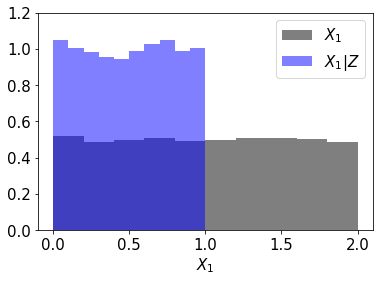

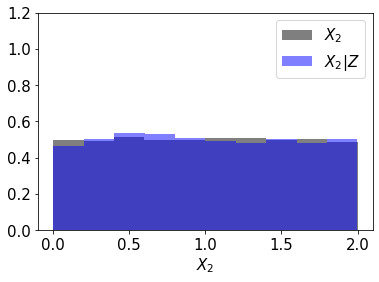

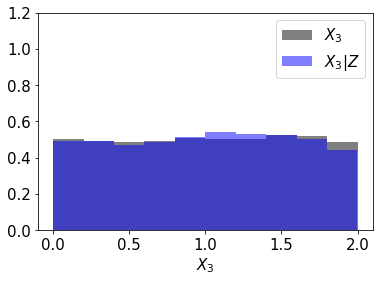

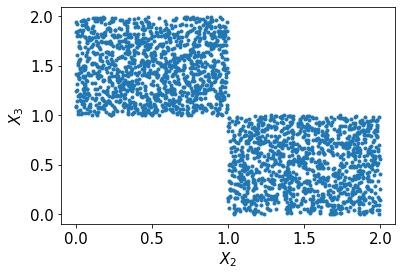

In [24]:
base_font = plt.rcParams["font.size"]
plt.rcParams.update({'font.size': 15})

plt.hist(X1, color="black", alpha=0.5, density=True, label=r"$X_1$")
plt.hist(X1[np.where(Y == 0)], color="blue", alpha=0.5, density=True,
         label=r"$X_1|Z$")
plt.ylim([0,1.2])
plt.xlabel(r"$X_1$")
plt.legend()
plt.show()


plt.hist(X2, color="black", alpha=0.5, density=True, label=r"$X_2$")
plt.hist(X2[np.where(Y == 0)], color="blue", alpha=0.5, density=True,
         label=r"$X_2|Z$")
plt.ylim([0,1.2])
plt.xlabel(r"$X_2$")
plt.legend()
plt.show()

plt.hist(X3, color="black", alpha=0.5, density=True, label=r"$X_3$")
plt.hist(X3[np.where(Y == 0)], color="blue", alpha=0.5, density=True,
         label=r"$X_3|Z$")
plt.ylim([0,1.2])
plt.xlabel(r"$X_3$")
plt.legend()
plt.show()

plt.plot(X2[np.where(Y == 0)],X3[np.where(Y == 0)], '.')
plt.xlabel(r"$X_2$")
plt.ylabel(r"$X_3$")
plt.show()

In [25]:
X_d = np.c_[X1, X2, X3, X4, X5]
n = X_d.shape[1]
h_mat_d = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            #### CAREFULE WITH INFO SET TO [0,0] BECAUSE ALL IS CONTINUOUS
        h_mat_d[i, j] = hsic(X_d[:, [i, j]], Y, q, raw=True, info=["continuous", "continuous"], bounds=[[0,2],[0,2]])[0]


In [26]:
print("HSIC of X1:\n")
print(h_mat_d[0, 0] )
print("\n")
print("HSIC of X2:\n")
print(h_mat_d[1, 1] )
print("\n")
print("HSIC of X3:\n")
print(h_mat_d[2, 2] )
print("\n")
print("HSIC of (X2, X3):\n")
print(h_mat_d[1, 2] )
print("\n")
print("HSIC of (X4, X5):\n")
print(h_mat_d[3, 4] )
print("\n")

HSIC of X1:

0.015137083567600547


HSIC of X2:

6.260579901638153e-06


HSIC of X3:

1.6441894409642544e-05


HSIC of (X2, X3):

0.00347430608441226


HSIC of (X4, X5):

3.704084821968934e-06




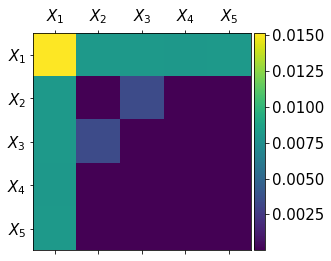

In [30]:
plt.figure()
ax = plt.gca()
im = ax.matshow(h_mat_d)

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels([r"$X_1$", r"$X_2$", r"$X_3$", r"$X_4$", r"$X_5$"])
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels([r"$X_1$", r"$X_2$", r"$X_3$", r"$X_4$", r"$X_5$"])
plt.show()


# 3. Conditionality between hyperparameters

Let $f: [0,2]^3 \rightarrow \{0,1\}$ such that:
$$
       f(X_1, X_2, X_3) = 
   \Bigg\{\begin{array}{ll}
    B & \text{if  } X_1 \in [0,1], X_2 \in [0,t]\\
    1 & \text{if  } X_1 \in [0,1], X_2 \in [t,2], X_3 \in [0,1],\\
    0 & \text{otherwise,  } 
    \end{array}
$$



In [31]:
def f(X1, X2, X3, t=1):
    if X2 > t:
        if (X1 <= 1) & (X3 <= 1):
            return 1
        else:
            return 0
    else:
        if (X1 <= 1):
            return int(1*np.random.randint(2))
        else:
            return 0

vf = np.vectorize(f)

In [36]:
N = 2000
q = 0.1
X1 = np.random.random_sample(N)*2
X2 = np.random.random_sample(N)*2
X3 = np.random.random_sample(N)*2

Y = 1 - vf(X1, X2, X3)

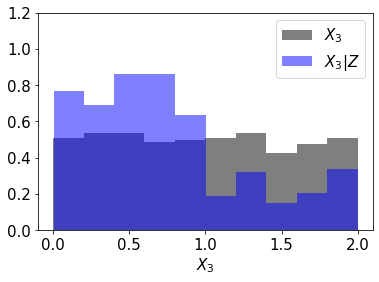

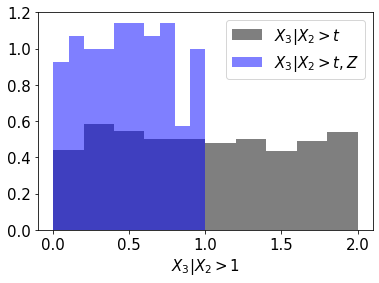

In [37]:
base_font = plt.rcParams["font.size"]
plt.rcParams.update({'font.size': 15})

plt.figsize=([6.4, 4.8])
plt.hist(X3, color="black", alpha=0.5, density=True, label=r"$X_3$")
plt.hist(X3[np.where(Y == 0)], color="blue", alpha=0.5, density=True, label=r"$X_3|Z$")
plt.xlabel(r"$X_3$")
plt.ylim([0,1.2])
plt.legend()
plt.show()

plt.figsize=([6.4, 4.8])
plt.hist(X3[np.where((X2 >1))], color="black", alpha=0.5, density=True,
         label=r"$X_3|X_2>t$")
plt.hist(X3[np.where((Y == 0) & (X2 >1))], color="blue", alpha=0.5, density=True,
         label=r"$X_3|X_2>t,Z$")
plt.xlabel(r"$X_3|X_2>1$")
plt.ylim([0,1.2])
plt.legend()
plt.show()

In [38]:
X = np.c_[X1, X2, X3]

hsics = []
for i in range(3):
    hsics_, var_hsics = hsic(X[:,i], Y, q, raw=True, info="continuous", bounds=[0,2], bw="max")
    hsics.append(hsics_)

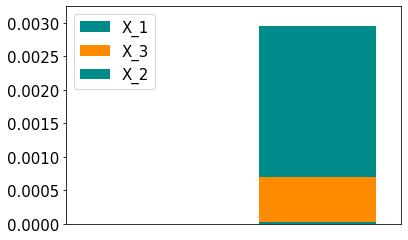

In [39]:
hsic_bar(hsics, int(q*X.shape[0]), color=colors, label=labels)

In [40]:
Xcond = X[np.where(X2 > 1)]
Ycond = Y[np.where(X2 > 1)]

labels_cond = [r"X_1|X_2>t", r"X_2|X_2>t", r"X_3|X_2>t"]

hsics_cond = []
for i in range(3):
    hsics_, var_hsics = hsic(Xcond[:,i], Ycond, q, raw=True, info="continuous", bounds=[0,2], bw="max")
    hsics_cond.append(hsics_)

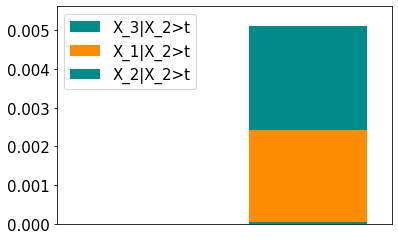

In [41]:
hsic_bar(hsics_cond, int(q*X.shape[0]), color=colors, label=labels_cond)

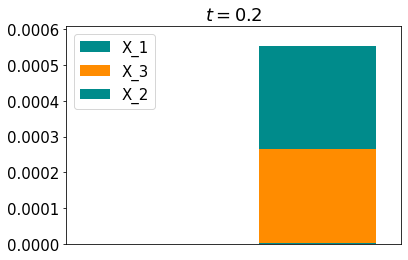

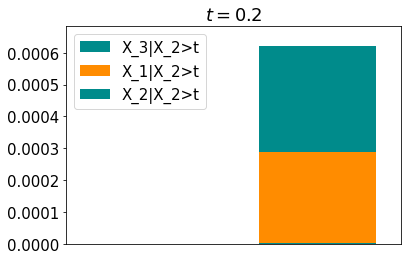

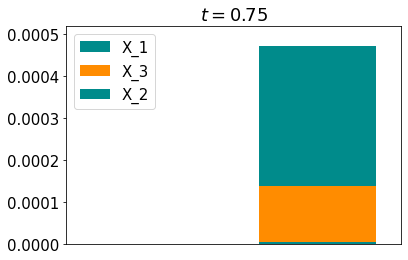

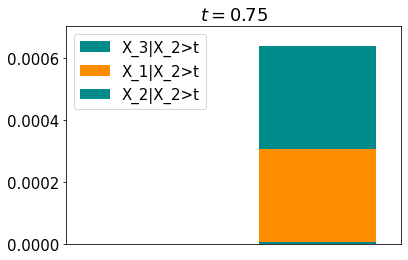

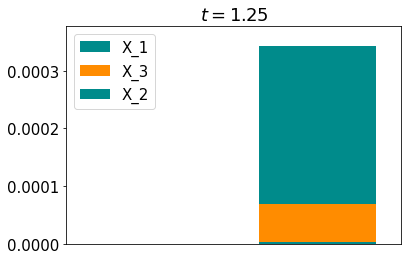

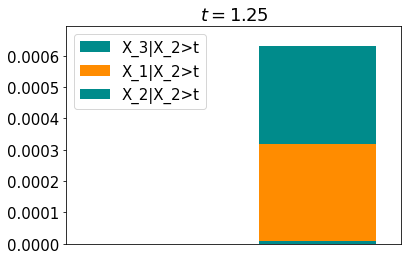

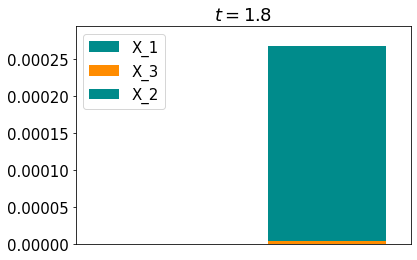

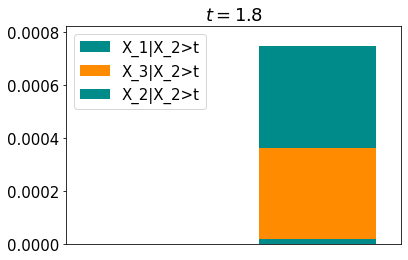

In [43]:
t_arr = [0.2, 0.75, 1.25, 1.8]

for i, t in enumerate(t_arr):
    def F(X1, X2, X3):
        return f(X1, X2, X3, t)
    vF = np.vectorize(F)
    Y = vF(X1, X2, X3)

    Xcond = X[np.where(X2 > t)]
    Ycond = Y[np.where(X2 > t)]

    hsics_c = []
    for i in range(3):
        hsics_, var_hsics = hsic(X[:,i], Y, q, raw=True, info="continuous", bounds=[0,2], bw="max")
        hsics_c.append(hsics_)

    hsic_bar(hsics_c, int(q * X.shape[0]), color=colors, label=labels,
             title=r"$t=$" + str(t))

    ######
    hsics_n = []
    for i in range(3):
        hsics_, var_hsics = hsic(Xcond[:,i], Ycond, q, raw=True, info="continuous", bounds=[0,2], bw="max")
        hsics_n.append(hsics_)
    hsic_bar(hsics_n, int(q * Xcond.shape[0]), color=colors, label=labels_cond,
             title=r"$t=$" + str(t))